Посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

Задание:

1) Загрузим данные, проверим число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

2) Построить график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

3) Создать новую колонку c CTR. Посмотреть на описательные статистики и распределение.

4) Проанализировать CTR с разбивкой по рекламной кампании.

5) Посчитать стоимость за клик пользователя по объявлению (CPC). Изучить полученные значения, используя меры центральной тенденции и меры изменчивости. 

6) Визуализировать CPC с разбивкой по полу пользователей, которым были показаны объявления. 

7) Посчитать конверсию из клика в покупку.

Описание данных:

**ad_id** – идентификатор объявления (рекламы).

**xyz_campaign_id** – идентификатор рекламной кампании в базе компании X.

**fb_campaign_id** – идентификатор кампании в Facebook.

**age** – возрастная группа, которой показывалась реклама.

**gender** – пол тех, кому показывалась реклама.

**interest** – код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.).

**impressions** – число показов.

**clicks** – число кликов.

**spent** – сумма, которую компания потратила на показ объявления.

**total_conversion** – количество людей, которые заинтересовались продуктом после просмотра рекламы.

**approved_conversion** – количество людей, которые купили продукт после просмотра рекламы.

In [151]:
import pandas as pd
import scipy
from scipy import stats
from scipy import linalg
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

In [152]:
#Загружаем данные и смотрим количество пустых значений по столбцам
df = pd.read_csv("/Users/siarheimasliankou/Documents/Work/DA_Practice/Statistics/Task_2/conversion.csv")
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [153]:
df.shape

(1143, 11)

In [154]:
df.xyz_campaign_id.nunique()

3

In [155]:
#Строим график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения 
#c помощью np.log()

d = df.groupby('fb_campaign_id', as_index = False)\
      .agg({'Impressions': 'sum'})
d

,fb_campaign_id,Impressions
0,103916,7350
1,103917,17861
2,103920,693
3,103928,8392
4,103929,1915
...,...,...
686,179977,1129773
687,179978,637549
688,179979,151531
689,179981,790253


In [156]:
#Альтернативный способ
d = df.groupby('fb_campaign_id').sum('Impressions')
f = np.log(d.Impressions)
f

fb_campaign_id
103916     8.902456
103917     9.790375
103920     6.541030
103928     9.035034
103929     7.557473
            ...    
179977    13.937527
179978    13.365386
179979    11.928546
179981    13.580108
179982    13.148345
Name: Impressions, Length: 691, dtype: float64

/var/folders/m8/68839tv13t51_96pglc60m600000gn/T/ipykernel_43599/940425893.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  r = sns.distplot(f, kde = False)


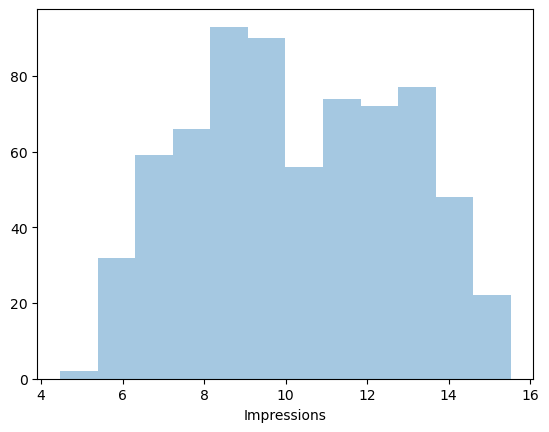

In [157]:
#Построим график

r = sns.distplot(f, kde = False)

In [158]:
#Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), 
#которая показывает кликабельность, т.е. отношение числа кликов к количеству показов
#Создадим новую колонку, затем посмотрите на описательные статистики. 
#В качестве ответа укажем ad_id объявления с наибольшим CTR.

df['CTR'] = df['Clicks']/df['Impressions']

In [159]:
t = df['CTR'].describe()
t

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [160]:
k = df.groupby('ad_id', as_index = False)\
      .agg({'CTR': 'max'})\
      .sort_values(by='CTR', ascending=False)
k

,ad_id,CTR
150,738637,0.001059
440,950224,0.000845
505,951779,0.000610
476,951202,0.000565
448,950537,0.000531
...,...,...
270,777166,0.000000
269,777131,0.000000
268,777130,0.000000
266,776935,0.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


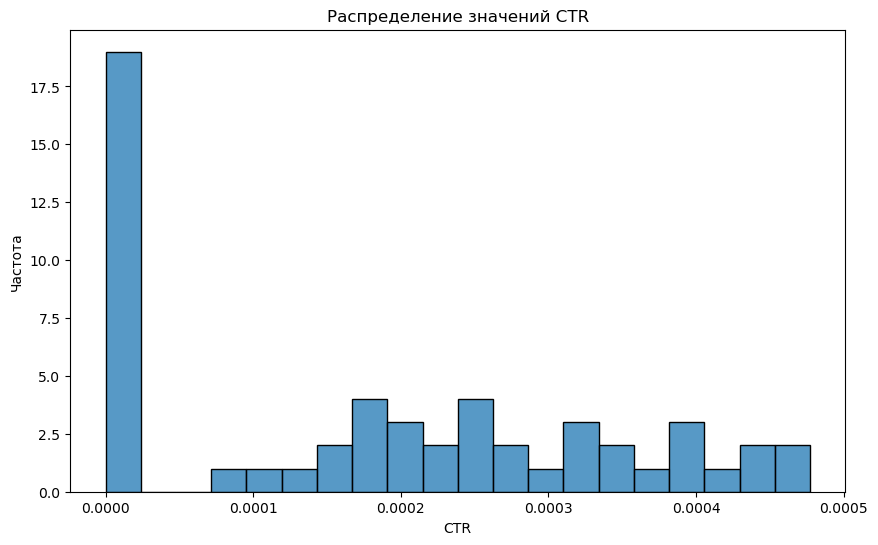

In [161]:
#Визуализируeм CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). 
#Построим график распределения CTR кампании 916?

b = df.query('xyz_campaign_id == 916')
plt.figure(figsize=(10, 6))
sns.histplot(b['CTR'], bins=20, kde=False)

plt.title('Распределение значений CTR')
plt.xlabel('CTR')
plt.ylabel('Частота')


plt.show()

In [162]:
#Рассчитаем CPC (cost-per-click) – стоимость за клик пользователя по объявлению. 
#Рассчитывается путём деления суммы потраченных денег на общее число кликов

df['CPC'] = df['Spent']/df['Clicks']

#Выводим описательные статистики для столбца
df['CPC'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [163]:
#Cчитаем межквартильный размах
1.644364-1.390000

0.25436400000000003

In [164]:
##Cчитаем межквартильный размах через scipy.stats
IQR = ss.iqr(df['CPC'], nan_policy='omit')
IQR

0.2543636990499998

In [165]:
#Удаляем пропущенные значения
df_cleaned = df.dropna(subset=['CPC'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CPC', ylabel='Count'>

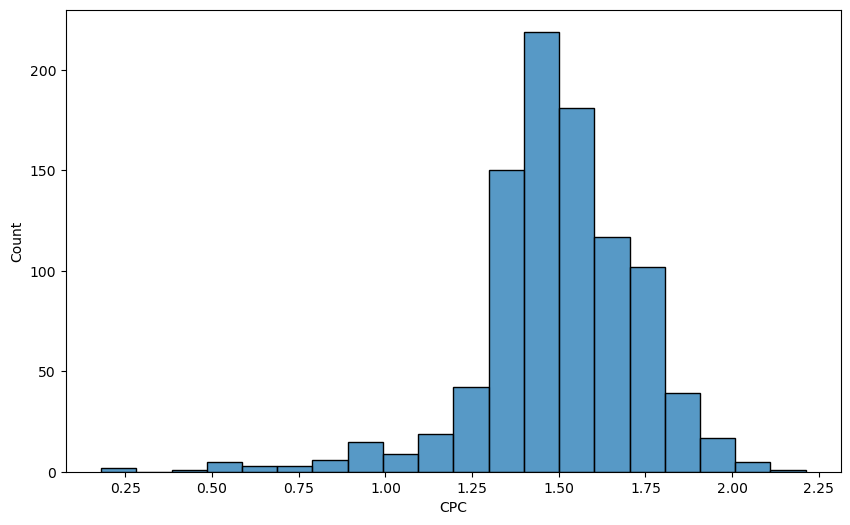

In [166]:
#Добавляем график
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['CPC'], bins=20, kde=False)

/var/folders/m8/68839tv13t51_96pglc60m600000gn/T/ipykernel_43599/1400930309.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mm['CPC'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/m8/68839tv13t51_96pglc60m600000gn/T/ipykernel_43599/1400930309.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level funct

<Axes: xlabel='CPC', ylabel='Density'>

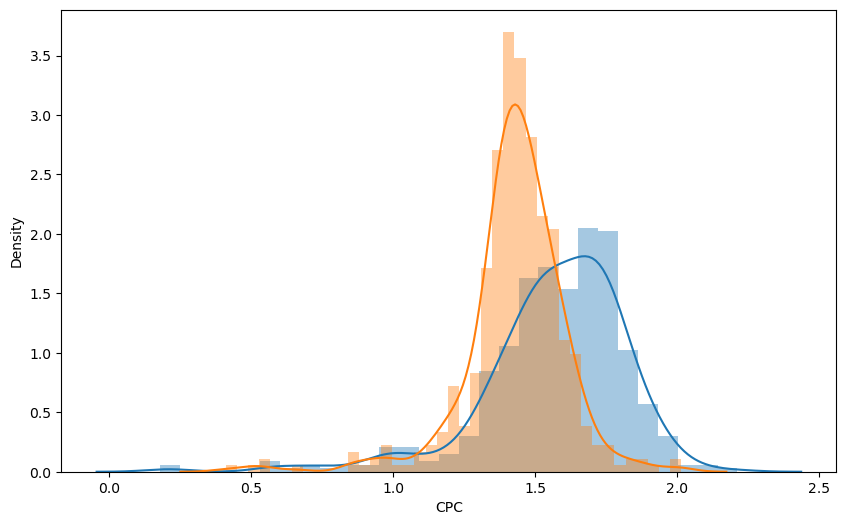

In [167]:
#Визуализируем CPC с разбивкой по полу пользователей, которым были показаны объявления.
m = df_cleaned[['gender', 'CPC']]
mm = df_cleaned.query("gender == 'M'")
wm = df_cleaned.query("gender == 'F'")
#Строим графики
plt.figure(figsize=(10, 6))
sns.distplot(mm['CPC'])
sns.distplot(wm['CPC'])

In [168]:
#Посчитаем конверсию из клика в покупку. 
df['Conversion'] = df['Approved_Conversion']/df['Clicks']

#Также, посчитаем конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки.
c = df[df['ad_id'] == 1121814]
c

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,Conversion
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,0.030879


In [169]:
#Переведем в проценты и округлим
conv_in_percent = 0.030879 * 100  
conv_in_percent_rounded = round(conv_in_percent, 2)
conv_in_percent_rounded

3.09